<a href="https://colab.research.google.com/github/sofiacorreao/Analitica/blob/main/Parcial_1_Sofia_Correa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Importar librerias

In [ ]:
import numpy as np #Funciones matematicas
import pandas as pd #Comunicación con Excel
from sklearn.naive_bayes import GaussianNB #Funcion Gaussiana
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix #La metrica de medicion
import matplotlib.pyplot as plt #Gráficador de cosas
import seaborn as sns #Gráficador de cosas

#### Cargar la base de datos

In [ ]:
nxl='/content/4. BD_Parcial_L_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna() #Elimina celdas vacias o sin datos
XDB['Sex'] = XDB['Sex'].replace({'M':0,'F':1}) # Convertir la variable sex como una variable categorica

#Se procede con la seleccion de las variables de trabajo
XD=np.array(XDB[['White', 'HS GPA', 'SAT', 'GPA', 'College Parent']]) #Datos entrada
yd=np.array(XDB[['Grad']]) #Este es el dato que quiero que el modelo pronostique

#### **1.¿Determinar cuales son las variables que tienen una mayor correlación entre ellas, teniendo en cuenta para este análisis la variable de pronóstico o variable de salida ‘Grad’?**

#### Matriz de correlacion

In [ ]:
corr = XDB.corr() # Hacer la matriz de correlacion de las variables
corr

,Sex,White,HS GPA,SAT,GPA,College Parent,Grad
Sex,1.000000,0.029289,0.030116,-0.171818,0.171945,-0.021320,0.163517
White,0.029289,1.000000,0.130981,0.191930,0.194132,-0.005987,0.133612
HS GPA,0.030116,0.130981,1.000000,0.346767,0.376932,0.020068,0.283404
SAT,-0.171818,0.191930,0.346767,1.000000,0.260927,-0.029768,0.172794
GPA,0.171945,0.194132,0.376932,0.260927,1.000000,-0.015137,0.726624
College Parent,-0.021320,-0.005987,0.020068,-0.029768,-0.015137,1.000000,-0.018035
Grad,0.163517,0.133612,0.283404,0.172794,0.726624,-0.018035,1.000000


In [ ]:
corr['Grad'].sort_values(ascending=False)[1:] # Ordenar de mayor a menor los valores de la correlacion entre las variables independiente y la dependiente u objetivo

,Grad
GPA,0.726624
HS GPA,0.283404
SAT,0.172794
Sex,0.163517
White,0.133612
College Parent,-0.018035


##### **Respuesta**

Las variables con mayor correlacion con respecto a la variable de pronostico 'Grad' son:

- Grad - GPA: **0.73**
- Grad - HS GPA: **0.28**

#### **2. ¿Cuáles son las dos variables que tienen mayor correlación frente a la  graficación de los datos?**

#### Matriz de correlacion - gráfica

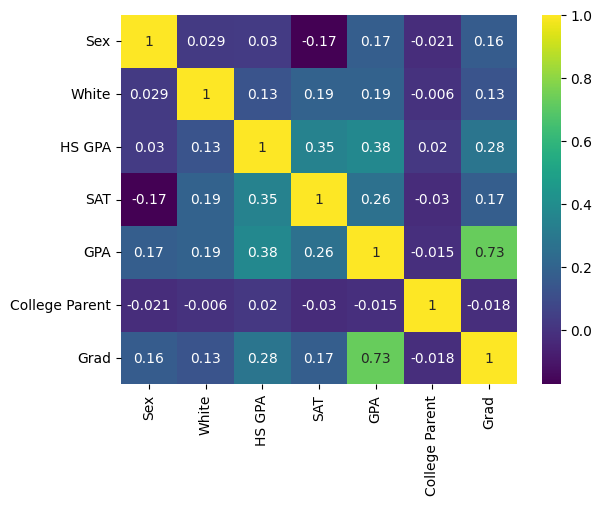

In [ ]:
sns.heatmap(XDB.corr(), annot=True, cmap = 'viridis'); # Graficar la matriz de correlacion

##### **Respuesta**

Entre las otras variables independientes la mayor correlación se da entre:

- GPA - HS GPA: **0.38**
- SAT - HS GPA: **0.35**

### **Ajustar un modelo de Naive Bayes**

#### **3. ¿Cuál es el grupo de clasificación que logró la mayor calificación en la preparatoria (HS GPA) y el promedio de la Universidad (GPA)?**

In [ ]:
XDB.columns

Index(['Sex', 'White', 'HS GPA', 'SAT', 'GPA', 'College Parent', 'Grad'], dtype='object')

In [ ]:
mnb=GaussianNB() #Llamamos el modelo
mnb.fit(XD,yd) # Ajustar el modelo a los datos de entrada y salida
ydp=mnb.predict(XD) # Pronostico intramuestral

#Parametros del modelo por categoria - Graduado / NO graduado
u=mnb.theta_ #Se estiman las medias
sigma=np.sqrt(mnb.var_) #Se estiman las varianzas

#Las variaciones de las variables
LI=u-sigma
LS=u+sigma

print('La media de las variables por categoria:')
print (u)
print('El limite inferior de la variación de las variables por categoria es:')
print(LI)
print('El limite superior de la variación de las variables por categoria es:')
print (LS)

#Métrica de evaluación - Como se comporto el modelo identificando Graduado / NO graduado
cm=confusion_matrix(yd,ydp) #Matriz de confusion

La media de las variables por categoria:
[[5.86038961e-01 3.70939935e+00 1.23485390e+03 2.43128247e+00
  6.98051948e-01]
 [7.21098266e-01 3.91479769e+00 1.28854769e+03 3.28720303e+00
  6.79913295e-01]]
El limite inferior de la variación de las variables por categoria es:
[[9.34763992e-02 3.33244695e+00 1.08319860e+03 1.95529138e+00
  2.38926686e-01]
 [2.72616229e-01 3.62226610e+00 1.15210925e+03 2.96953734e+00
  2.13381638e-01]]
El limite superior de la variación de las variables por categoria es:
[[1.07860152e+00 4.08635175e+00 1.38650919e+03 2.90727356e+00
  1.15717721e+00]
 [1.16958030e+00 4.20732928e+00 1.42498613e+03 3.60486872e+00
  1.14644495e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El array de arriba es para los 'Grad = 0'

El array de abajo es para los 'Grad = 1'

In [ ]:
print(f'La media del HS GPA de los NO graduados es: {np.round(u[0, 1], 4)}')
print(f'La media del HS GPA de los SI graduados es: {np.round(u[1, 1], 4)}')
print('-------------------------------------------------------------------------')
print(f'La media del GPA de los NO graduados es: {np.round(u[0, 3], 4)}')
print(f'La media del GPA de los SI graduados es: {np.round(u[1, 3], 4)}')

La media del HS GPA de los NO graduados es: 3.7094
La media del HS GPA de los SI graduados es: 3.9148
-------------------------------------------------------------------------
La media del GPA de los NO graduados es: 2.4313
La media del GPA de los SI graduados es: 3.2872


#### **4.¿De acuerdo con los índices de exactitud, sensibilidad y especificidad, determinar cómo fue el comportamiento del modelo?**

In [ ]:
VN=cm[0,0] #Verdaderos negativos
FP=cm[0,1] #Falsos positivos
FN=cm[1,0] #Falsos negativos
VP=cm[1,1] #Verdaderos positivos

Exactitud=(VN+VP)/len(XD)
print('La Exactitud es:',Exactitud) #Comportamiento general

Sensibilidad=VP/(FN+VP)
print('La Sensibilidad es:',Sensibilidad) #Como se comporto frente a los positivos

Especificidad=VN/(VN+FP)
print('La Especificidad es:',Especificidad) #Como se comportaron frente a los negativos

La Exactitud es: 0.867
La Sensibilidad es: 0.9263005780346821
La Especificidad es: 0.7337662337662337


##### **Respuesta**

La Exactitud es: **0.867**

La Sensibilidad es: **0.9263**

La Especificidad es: **0.7337**

El modelo de Naive Bayes mostró un desempeño positivo.  La exactitud fue del 86,70%, lo que refleja una capacidad sólida del modelo para predecir correctamente los casos generales. La sensibilidad alcanzó el 92,63%, indicando que el modelo tiene un excelente desempeño en la identificación de personas que lograrán graduarse en el tiempo estipulado. Por otro lado, la especificidad fue de 73,37%, lo que sugiere que es algo menos preciso en la clasificación de quienes no lograrán graduarse en cuatro años. En conjunto, el modelo ofrece un buen equilibrio entre las predicciones correctas de ambos casos, aunque con una ligera inclinación hacia la identificación de quienes sí completarán su grado en el tiempo previsto.

#### **5. ¿Determinar la categoría a la cual pertenecen cada uno de los individuos de pronóstico (Hoja 2)?**

##### **Predicciones y respuesta**

In [ ]:
Xun=np.array([[ 1, 4, 1260, 1.9, 1]]) #Esta es la persona 1 del Excel(Hoja 2)
ydun=mnb.predict(Xun)
print(ydun)

[0]


In [ ]:
Xun=np.array([[ 1, 2.91, 1090, 2.719, 1]]) #Esta es la persona 2 del Excel(Hoja 2)
ydun=mnb.predict(Xun)
print(ydun)

[0]


In [ ]:
Xun=np.array([[ 0, 3.58, 1210, 3.319, 1]]) #Esta es la persona 3 del Excel(Hoja 2)
ydun=mnb.predict(Xun)
print(ydun)

[1]


Persona 1: NO graduado

Persona 2: No graduado

Persona 3: SI graduado

### **Ajustar un modelo Decision Tree**

#### **6. ¿Cuál fue el comportamiento que tuvo el modelo frente a los índices de exactitud, sensibilidad y especificidad, y comparar este comportamiento con el modelo Naive Bayes?**

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4) #4 niveles o variables de entrada
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

#Evaluamos el modelo
VN=cm [0,0]
FP=cm [0,1]
FN=cm[1,0]
VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP) #Que porcentaje de los datos prónostico correctamente
print('La exactitud alcanzada por el modelo es:',Ex)
Se= VP/(FN+VP)
print('La sensibilidad alcanzada por el modelo fue:',Se)
Es=VN/(VN+FP)
print('La especificidad alcanzada por el modelo fue:',Es)

[[ 422  194]
 [   2 1382]]
La exactitud alcanzada por el modelo es: 0.902
La sensibilidad alcanzada por el modelo fue: 0.9985549132947977
La especificidad alcanzada por el modelo fue: 0.685064935064935


##### **Respuesta**
El modelo de árbol de decisión tuvo un comportamiento bueno, con una exactitud de 90,2%, el modelo es altamente eficaz en la clasificación general de los casos. Su sensibilidad sobresaliente del 99,86% indica que casi todas las personas que lograrán graduarse fueron correctamente identificadas. Sin embargo, la especificidad fue más baja, alcanzando solo un 68,51%, lo que revela que el modelo tiene dificultades para identificar correctamente a quienes no lograrán graduarse en el tiempo estipulado. En resumen, el árbol de decisión es muy eficaz para predecir los casos positivos, pero es menos preciso en la clasificación de los negativos.

Comparado con el modelo Naive Bayes y comparando ambos modelos, el árbol de decisión tiene una mayor exactitud (90,2% vs. 86,70%) y una sensibilidad notablemente superior (99,86% vs. 92,63%) en comparación con Naive Bayes, lo que lo hace excelente para predecir a quienes lograrán graduarse. Sin embargo, Naive Bayes es mejor en términos de especificidad (82,86% vs. 73,37%), mostrando mayor precisión al identificar a quienes no se graduarán. En resumen, el árbol de decisión es más eficaz para predecir graduaciones, mientras que Naive Bayes es más equilibrado en ambas clases.

#### **7.¿Indicar las reglas del negocio que definen los nodos puros?**

#### Graficar el arbol

In [ ]:
#Estas son las librerias para gráficar el arbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=[ 'White', 'HS GPA', 'SAT', 'GPA', 'College Parent'] #Son los titulos para los nodos
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

##### **Respuesta**

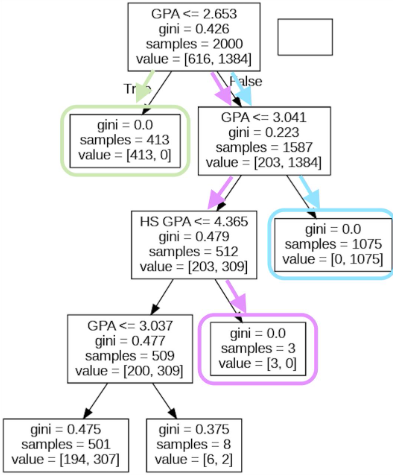

#### **8.Determinar las reglas a las que pertenecen los individuos de pronóstico (Hoja 2).**

##### **Respuesta**

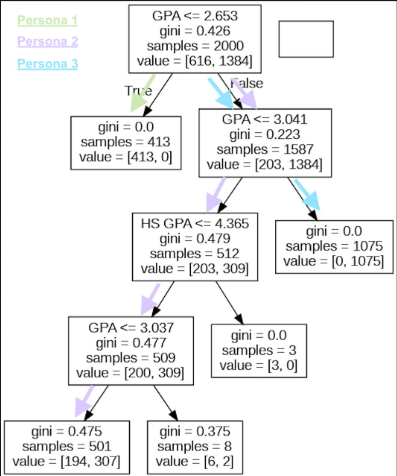

###**Agrupamiento de Kmeans**

#### **9.Determinar los clusters que lograron la mayor calificación en la preparatoria (HS GPA) y el promedio de la calificación en la Universidad (GPA)**

In [ ]:
np.random.seed(42)  # Para que todos tengamos el mismo modelo

#Se procede con la seleccion de las variables de trabajo
XD=np.array(XDB.iloc[:,1:6]) #Datos entrada
yd=np.array(XDB.iloc[:,6]) #Este es el dato que quiero que el modelo pronostique

# Crear el modelo de KMeans
mkm = KMeans(n_clusters=5, init='random', random_state=42)
mkm.fit(XD,yd)  # Solo usas XD para entrenar
labels=mkm.labels_
# Características de cada cluster
clusters = mkm.cluster_centers_
print('Las características de cada cluster son:\n', clusters)

C00=len(np.where((labels==0)&(yd==1))[0])

Las características de cada cluster son:
 [[4.64684015e-01 3.63951673e+00 1.05312268e+03 2.70508550e+00
  7.32342007e-01]
 [6.40794224e-01 3.80368231e+00 1.19072202e+03 2.97076354e+00
  6.85920578e-01]
 [7.72540984e-01 3.96206967e+00 1.44682377e+03 3.16286475e+00
  6.59836066e-01]
 [7.28862974e-01 3.90004373e+00 1.30469388e+03 3.09267201e+00
  6.85131195e-01]
 [6.66666667e-01 2.62666667e+00 2.27373675e-13 2.87900000e+00
  6.66666667e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
XDB.columns

Index(['Sex', 'White', 'HS GPA', 'SAT', 'GPA', 'College Parent', 'Grad'], dtype='object')

In [ ]:
# Para el cluster 0
print(f'El HS GPA medio del cluster 0 es: {XD[mkm.labels_ == 0][: , 1].mean()}')
print(f'El GPA medio del cluster 0 es: {XD[mkm.labels_ == 0][: , 3].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 1
print(f'El HS GPA medio del cluster 1 es: {XD[mkm.labels_ == 1][: , 1].mean()}')
print(f'El GPA medio del cluster 1 es: {XD[mkm.labels_ == 1][: , 3].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 2
print(f'El HS GPA medio del cluster 2 es: {XD[mkm.labels_ == 2][: , 1].mean()}')
print(f'El GPA medio del cluster 2 es: {XD[mkm.labels_ == 2][: , 3].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 3
print(f'El HS GPA medio del cluster 3 es: {XD[mkm.labels_ == 3][: , 1].mean()}')
print(f'El GPA medio del cluster 3 es: {XD[mkm.labels_ == 3][: , 3].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 4
print(f'El HS GPA medio del cluster 4 es: {XD[mkm.labels_ == 4][: , 1].mean()}')
print(f'El GPA medio del cluster 4 es: {XD[mkm.labels_ == 4][: , 3].mean()}')
print('--------------------------------------------------------------------')

El HS GPA medio del cluster 0 es: 3.6395167286245353
El GPA medio del cluster 0 es: 2.705085501858736
--------------------------------------------------------------------
El HS GPA medio del cluster 1 es: 3.8036823104693136
El GPA medio del cluster 1 es: 2.970763537906137
--------------------------------------------------------------------
El HS GPA medio del cluster 2 es: 3.9620696721311477
El GPA medio del cluster 2 es: 3.162864754098361
--------------------------------------------------------------------
El HS GPA medio del cluster 3 es: 3.900043731778426
El GPA medio del cluster 3 es: 3.0926720116618074
--------------------------------------------------------------------
El HS GPA medio del cluster 4 es: 2.6266666666666665
El GPA medio del cluster 4 es: 2.879
--------------------------------------------------------------------


##### **Respuesta**

El cluster que logró la mayor calificación tanto para la variable 'HS GPA' como para 'GPA' fue el cluster 2, con los siguientes valores:

- El HS GPA medio del cluster 2 es: 3.9621

- El GPA medio del cluster 2 es: 3.1629

#### **10.Compara el coeficiente de Exactitud, Sensibilidad y Especificidad alcanzado por este modelo y comparar su desempeño con los demás modelos.**

#### Ajustar un modelo KNN

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 vecinos
mknn.fit(XD,yd) #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print('Esta es la matriz de confusion:\n',cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print('Exactitud:',Exac)
print('Sensibilidad:',Sen)
print('Especificidad:',Spec)

Esta es la matriz de confusion:
 [[ 386  230]
 [  69 1315]]
Exactitud: 0.8505
Sensibilidad: 0.9501445086705202
Especificidad: 0.6266233766233766


In [ ]:
# Predecir nuevo punto
XDP = np.array([[ 1, 4, 1260, 1.9, 1]])
ydpp2 = mknn.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [0]


In [ ]:
# Predecir nuevo punto
XDP = np.array([[ 1, 2.91, 1090, 2.719, 1]])
ydpp2 = mknn.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [0]


In [ ]:
# Predecir nuevo punto
XDP = np.array([[ 0, 3.58, 1210, 3.319, 1]])
ydpp2 = mknn.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [1]


##### **Respuesta**

Este modelo obtuvo una exactitud del 85.05%, lo que indica que el modelo tiene un buen rendimiento general. La alta sensibilidad del 95.01% sugiere que el modelo es muy efectivo para identificar correctamente a aquellos estudiantes que sí lograrán su grado en el tiempo previsto, minimizando los falsos negativos. Sin embargo, la especificidad del 62.66% muestra que el modelo tiene una menor capacidad para identificar a aquellos que no alcanzarán el grado en el plazo establecido, resultando en una mayor cantidad de falsos positivos. En resumen, el modelo es más confiable en predecir a quienes alcanzarán el grado, pero podría mejorar en la identificación precisa de quienes no lo lograrán.

Comparandolo con los otros modelos, este modelo, con una exactitud del 85.05%, es menos preciso que el árbol de decisión (90.2%) y el Naive Bayes (86.7%). Aunque este tiene una alta sensibilidad del 95.01%, superior a la del Naive Bayes (92,63%) y menor que la del árbol de decisión (99.86%), su especificidad es más baja (62.66%) en comparación con el Naive Bayes (73,37%) y el árbol de decisión (68.51%). Esto sugiere que, aunque este modelo es muy efectivo en identificar correctamente a los estudiantes que completarán su grado, tiene más dificultades para clasificar a quienes no lo lograrán en comparación con los otros dos modelos. El árbol de decisión es extremadamente bueno para detectar casos positivos pero tiene una precisión más baja en los negativos, mientras que Naive Bayes ofrece un mejor equilibrio entre la identificación de ambos tipos de casos, superando a este modelo en términos de especificidad y siendo más equilibrado en la clasificación general.

#### **11.Cuál es el clúster que posee la mayor cantidad de personas que van a graduarse e indicar el porcentaje de graduación.**

In [ ]:
# Número de individuos totales por cluster
print(f"Cluster 0: {len(np.where(mkm.labels_ == 0)[0])} individuos")
print(f"Cluster 1: {len(np.where(mkm.labels_ == 1)[0])} individuos")
print(f"Cluster 2: {len(np.where(mkm.labels_ == 2)[0])} individuos")
print(f"Cluster 3: {len(np.where(mkm.labels_ == 3)[0])} individuos")
print(f"Cluster 4: {len(np.where(mkm.labels_ == 4)[0])} individuos")

Cluster 0: 269 individuos
Cluster 1: 554 individuos
Cluster 2: 488 individuos
Cluster 3: 686 individuos
Cluster 4: 3 individuos


In [ ]:
# Número de individuos que SI van a graduarse por cluster
labels=np.array(mkm.labels_).reshape(2000,1)

len(np.where((labels==0) & (yd==1))[0])


print(f"Cluster 0: {len(np.where((labels == 0) & (yd == 1))[0])} individuos")
print(f"Cluster 1: {len(np.where((labels== 1) & (yd == 1))[0])} individuos")
print(f"Cluster 2: {len(np.where((labels== 2) & (yd == 1))[0])} individuos")
print(f"Cluster 3: {len(np.where((labels== 3) & (yd == 1))[0])} individuos")
print(f"Cluster 4: {len(np.where((labels==4) & (yd == 1))[0])} individuos")

Cluster 0: 131 individuos
Cluster 1: 371 individuos
Cluster 2: 370 individuos
Cluster 3: 510 individuos
Cluster 4: 2 individuos


In [ ]:
# Porcentajes en el cluster 0
c00 = len(np.where((mkm.labels_ == 0) & (yd == 0))[0])
c01 = len(np.where((mkm.labels_ == 0) & (yd == 1))[0])
print('El porcentaje de NO graduados para el cluster 0 es:', c00 / (c00 + c01))
print('El porcentaje de SI graduados para el cluster 0 es:', c01 / (c00 + c01))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 1
c10 = len(np.where((mkm.labels_ == 1) & (yd == 0))[0])
c11 = len(np.where((mkm.labels_ == 1) & (yd == 1))[0])
print('El porcentaje de NO graduados para el cluster 1 es:', c10 / (c10 + c11))
print('El porcentaje de SI graduados para el cluster 1 es:', c11 / (c10 + c11))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 2
c20 = len(np.where((mkm.labels_ == 2) & (yd == 0))[0])
c21 = len(np.where((mkm.labels_ == 2) & (yd == 1))[0])
print('El porcentaje de NO graduados para el cluster 2 es:', c20 / (c20 + c21))
print('El porcentaje de SI graduados para el cluster 2 es:', c21 / (c20 + c21))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 3
c30 = len(np.where((mkm.labels_ == 3) & (yd == 0))[0])
c31 = len(np.where((mkm.labels_ == 3) & (yd == 1))[0])
print('El porcentaje de NO graduados para el cluster 3 es:', c30 / (c30 + c31))
print('El porcentaje de SI graduados para el cluster 3 es:', c31 / (c30 + c31))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 4
c40 = len(np.where((mkm.labels_ == 4) & (yd == 0))[0])
c41 = len(np.where((mkm.labels_ == 4) & (yd == 1))[0])
print('El porcentaje de NO graduados para el cluster 4 es:', c40 / (c40 + c41))
print('El porcentaje de SI graduados para el cluster 4 es:', c41 / (c40 + c41))
print('--------------------------------------------------------------------')

El porcentaje de NO graduados para el cluster 0 es: 0.308
El porcentaje de SI graduados para el cluster 0 es: 0.692
--------------------------------------------------------------------
El porcentaje de NO graduados para el cluster 1 es: 0.308
El porcentaje de SI graduados para el cluster 1 es: 0.692
--------------------------------------------------------------------
El porcentaje de NO graduados para el cluster 2 es: 0.308
El porcentaje de SI graduados para el cluster 2 es: 0.692
--------------------------------------------------------------------
El porcentaje de NO graduados para el cluster 3 es: 0.308
El porcentaje de SI graduados para el cluster 3 es: 0.692
--------------------------------------------------------------------
El porcentaje de NO graduados para el cluster 4 es: 0.308
El porcentaje de SI graduados para el cluster 4 es: 0.692
--------------------------------------------------------------------


##### **Respuesta**

El cluster con mayor cantidad de personas que van a graduarse es el numero **3**.

El porcentaje de graduación del cluster 3 es de **74.3440%**

#### **12.Determinar el clúster al que pertenecen cada uno de los estudiantes que hacen parte de la hoja de pronóstico.**

In [ ]:
# Predecir nuevo punto
XDP = np.array([[1, 4, 1260, 1.9, 1]])
ydpp2 = mkm.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [3]


In [ ]:
# Predecir nuevo punto
XDP = np.array([[1, 2.91, 1090, 2.719, 1]])
ydpp2 = mkm.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [0]


In [ ]:
# Predecir nuevo punto
XDP = np.array([[0, 3.58, 1210, 3.319, 1]])
ydpp2 = mkm.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [1]


##### **Respuesta**

Persona 1: cluster 3

Persona 2: cluster 0

Persona 3: cluster 1

In [ ]:
# Para el cluster 1
print(f'El GPA media del cluster 0 es: {XD[mkm.labels_ == 0][: , 1].mean()}')
print(f'El HS GPA medio del cluster 0 es: {XD[mkm.labels_ == 0][: , 3].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 2
print(f'El GPA media del cluster 1 es: {XD[mkm.labels_ == 1][: , 1].mean()}')
print(f'El HS GPA medio del cluster 1 es: {XD[mkm.labels_ == 1][: , 3].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 3
print(f'El GPA media del cluster 2 es: {XD[mkm.labels_ == 2][: , 1].mean()}')
print(f'El HS GPA medio del cluster 2 es: {XD[mkm.labels_ == 2][: , 3].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 4
print(f'El GPA media del cluster 3 es: {XD[mkm.labels_ == 3][: , 1].mean()}')
print(f'El HS GPA medio del cluster 3 es: {XD[mkm.labels_ == 3][: , 3].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 5
print(f'El GPA media del cluster 4 es: {XD[mkm.labels_ == 4][: , 1].mean()}')
print(f'El HS GPA medio del cluster 4 es: {XD[mkm.labels_ == 4][: , 3].mean()}')
print('--------------------------------------------------------------------')

El GPA media del cluster 0 es: 3.6395167286245353
El HS GPA medio del cluster 0 es: 2.705085501858736
--------------------------------------------------------------------
El GPA media del cluster 1 es: 3.8036823104693136
El HS GPA medio del cluster 1 es: 2.970763537906137
--------------------------------------------------------------------
El GPA media del cluster 2 es: 3.9620696721311477
El HS GPA medio del cluster 2 es: 3.162864754098361
--------------------------------------------------------------------
El GPA media del cluster 3 es: 3.900043731778426
El HS GPA medio del cluster 3 es: 3.0926720116618074
--------------------------------------------------------------------
El GPA media del cluster 4 es: 2.6266666666666665
El HS GPA medio del cluster 4 es: 2.879
--------------------------------------------------------------------
